# 22. Методы оптимизации
Вариант №10

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from math import sin, cos

In [2]:
def graph(f, a, b):
    n = 101
    X = np.linspace(a, b, n)
    Y = list(map(f, X))
    plt.plot(X, Y)
    plt.show()

---
### Задание 1
Найти минимум функции f(x) отрезке `[a,b]`

$$f (x) = 2x^2 - 8x - 7, x \in [0, 3]$$

In [3]:
def f1(x):
    return 2*x**2 - 8*x - 7

a1, b1 = 0, 3

---
1) Методом поразрядного поиска

In [4]:
def bbb_search(f, a, b, e=0.0001):
    h = (b - a) / 4
    x0 = a
    while True:
        x1 = x0 + h
        if f(x0) > f(x1):
            x0 = x1
            if a < x0 < b:
                continue
        if abs(h) < e:
            return x0, f(x0)
        x0 = x1
        h = -h/4

bbb_search(f1, a1, b1)

(2.0000152587890625, -14.999999999534339)

---
2) Методом дихотомии

In [20]:
def dichotomy_search(f, a, b, e=0.0001):
    d = e/10
    h = (b-a)/2
    while True:
        x1 = (a + b - d) / 2
        x2 = (a + b + d) / 2
        if f(x1) <= f(x2):
            b = x2
        else:
            a = x1
        h = (b - a) / 2
        if h <= e:
            x = (a + b) / 2
            return x, f(x)


dichotomy_search(f1, a1, b1)


(1.999967815856933, -14.999999997928363)

---
3) Методом золотого сечения

In [22]:
def golden_ratio_search(f, a, b, epsilon=0.0001):

  h = (1+5**.5) / 2
  x1 = b - (b-a) / h
  x2 = a + (b-a) / h

  while abs(b - a) >= epsilon:
    if f(x1) >= f(x2):
      a = x1
    else:
      b = x2

    x1 = b - (b-a) / h
    x2 = a + (b-a) / h

  x = (a+b)/2
  return x, f(x)


golden_ratio_search(f1, a1, b1)


(2.000018586167158, -14.999999999309109)

---
Построить график функции на заданном отрезке

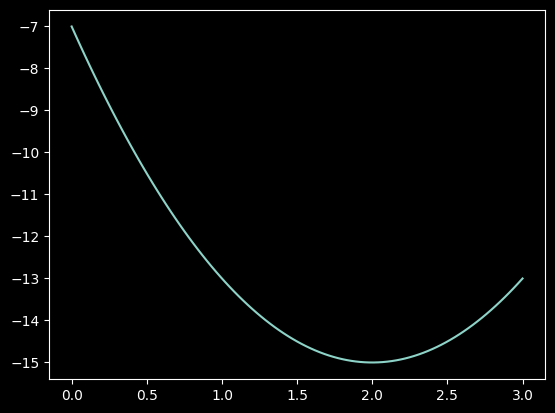

In [8]:
graph(f1, a1, b1)

---
## Задание 2
Найти минимум функции f(x) отрезке `[a,b]`

$$x^3 + 4x^2 - 4x + 1, x \in [-1, 2]$$

In [9]:
def f2(x):
    return x**3 + 4*x**2 - 4*x + 1

a2, b2 = -1, 2

---
Методом парабол

In [23]:
def parabola_method(f, a, b, e=0.0001):
    h = e*10
    x = a
    while True:
        nx = x - h/2 * (f(x+h) - f(x-h))/(f(x+h)-2*f(x)+f(x-h))
        if abs(x - nx) < e:
            return nx, f(nx)
        x = nx
parabola_method(f2, a2, b2)

(0.43050077963400996, 0.09910567262100467)

---
Построить график функции на заданном отрезке

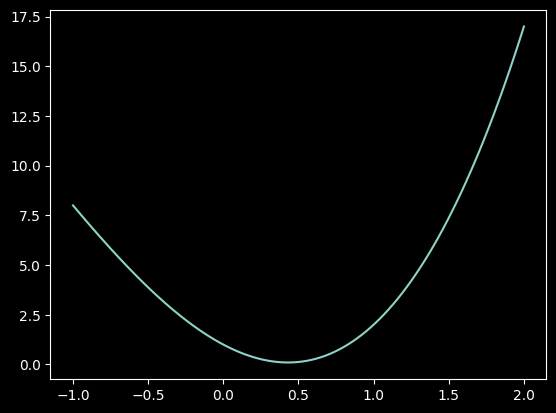

In [11]:
graph(f2, a2, b2)

---
## Задание 3
Найти минимум функции f(x) отрезке `[a,b]`

$$
\begin{align}
&f(x) = 2\cos(x) - \tfrac{1}{2}sin(x)\\
&f'(x) = -2\sin(x) - \tfrac{1}{2}cos(x)\\
&f''(x) = \tfrac{1}{2}\sin(x) - 2cos(x)\\
&x \in [2, 4]
\end{align}
$$

In [12]:
def f3(x):
    return 2*cos(x)-1/2*sin(x)


def f3_(x):
    # Производная f(x)
    return -2*sin(x)-1/2*cos(x)

def f3__(x):
    # Производная f_(x)
    return 1/2*sin(x)-2*cos(x)

a3, b3 = 2, 4

---
1) Методом средней точки

In [13]:
def center_point_method(f, f_, a, b, e=0.001):
    segment = [a, b]
    while True:
        nx = sum(segment)/2
        if abs(_f := f_(nx)) < e:
            return nx, f(nx)
        segment[_f > 0] = nx


center_point_method(f3, f3_, a3, b3)


(2.896484375, -2.0615527954916133)

---
2) Методом хорд

In [14]:
def chord_method(f, f_, a, b, e=0.001):
    segment = [a, b]
    while True:
        a, b = segment
        nx = a - f_(a)*(a-b)/(f_(a)-f_(b))
        if abs(_f := f_(nx)) < e:
            return nx, f(nx)
        segment[_f > 0] = nx


chord_method(f3, f3_, a3, b3)


(2.896614992728302, -2.0615528128077947)

---
3) Методом Ньютона

In [15]:
def nyuton_method(f, f_, f__, a, b, e=0.001):
    x = a
    while True:
        x = x - f_(x)/f__(x)
        if abs(f_(x)) < e:
            return x, f(x)


nyuton_method(f3, f3_, f3__, a3, b3)

(2.8966152756780756, -2.0615528128071277)

---
Построить график функции на заданном отрезке

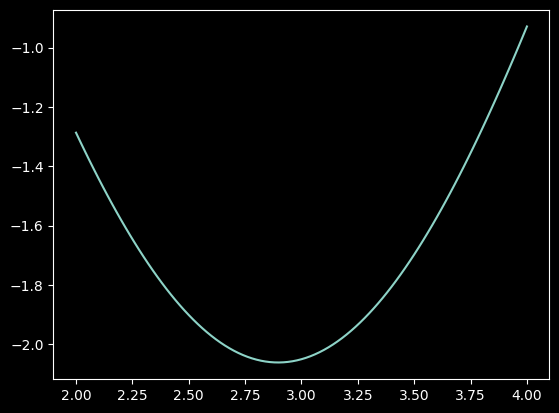

In [16]:
graph(f3, a3, b3)